[ 0.38529013  0.55955566 -0.32014068 -0.40419311 -0.36192063 -0.09198575
  0.1799599 ]
[ 0.03674591 -0.17977969  0.21037747 -0.41019421  0.43086354  0.20049587
 -0.58758268]
[-0.40954469  0.52747699 -0.41765466 -0.10617227  0.09631221  0.62383706
  0.33051884]
[ 0.69894189 -0.71862347 -0.16481694  0.11275052 -0.4581783  -0.06319324
  0.01217525]
-0.052852217387507214
-0.3626772796106272
-0.16230625431880102
0.14197005419715444
0.08551069320518233
0.3123422209189051
-0.09435096391489212
-0.2627332654933759
[-0.6283052  -0.36706642 -1.10236079 -1.03338087 -0.91462437 -0.69004381
 -0.56040484]
[-0.75422696 -0.92758374 -0.47127165 -1.04999378 -0.20379843 -0.4434762
 -1.2690663 ]
[-1.7843289  -0.76486963 -1.59770768 -1.20234789 -1.00942272 -0.56890208
 -0.98153478]
[-0.47195125 -1.87247794 -1.28033557 -1.00429944 -1.58875489 -1.16330382
 -1.0724257 ]
2.123856097166352
0.8561844161498845
2.2295303939184303
1.1822843133333785
-1.5155790172957804
1.2749706266734477
1.8781423451659105
0.7632635

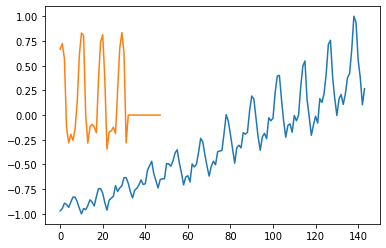

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from numpy import random
import math

def sliding_windows(a, x):
    split_data = np.array([[0.0]*a]*int(len(x)-a))
    labels = np.array([0.0]*int(len(x)-a))
    for i in range(len(x)-a):
        data_to_be_added = x[i:(i+a)]
        split_data[i] = data_to_be_added
        label_to_be_added = x[i+a]
        labels[i] = label_to_be_added
    return (split_data, labels)

def sigmoid(x):
    return 1/(1+np.exp(-x))
    

data_set = pd.read_csv('/users/kennethding/Documents/Airplane Data.csv')
data_set = data_set.to_numpy() 
scaler = MinMaxScaler()
data_set[:,1] = 2*scaler.fit_transform(data_set[:,1].reshape(144, 1)).reshape(144) - 1
training_data = data_set[:int(2/3*len(data_set)),:]
(transformed_training_data, labels) = sliding_windows(7, training_data[:,1])

W_if = random.normal(0, 1/math.sqrt(7), 7)
W_ii = random.normal(0, 1/math.sqrt(7), 7)
W_io = random.normal(0, 1/math.sqrt(7), 7)
W_ig = random.normal(0, 1/math.sqrt(7), 7)

W_hf = random.normal(0, 1/math.sqrt(7))
W_hi = random.normal(0, 1/math.sqrt(7))
W_ho = random.normal(0, 1/math.sqrt(7))
W_hg = random.normal(0, 1/math.sqrt(7))

b_f = random.normal(0, 1/math.sqrt(7))
b_i = random.normal(0, 1/math.sqrt(7))
b_o = random.normal(0, 1/math.sqrt(7))
b_g = random.normal(0, 1/math.sqrt(7))

print(W_if) 
print(W_ii)
print(W_io) 
print(W_ig)

print(W_hf)
print(W_hi)
print(W_ho)
print(W_hg)

print(b_f)
print(b_i)
print(b_o)
print(b_g) 

loss_across_epochs = [] 

W_if_m = np.array([0.0]*7)
W_if_v = np.array([0.0]*7)
W_ig_m = np.array([0.0]*7)
W_ig_v = np.array([0.0]*7)
W_ii_m = np.array([0.0]*7)
W_ii_v = np.array([0.0]*7)
W_io_m = np.array([0.0]*7)
W_io_v = np.array([0.0]*7)

W_hf_m = 0
W_hf_v = 0
W_hg_m = 0
W_hg_v = 0
W_hi_m = 0
W_hi_v = 0
W_ho_m = 0
W_ho_v = 0

b_f_m = 0
b_f_v = 0
b_g_m = 0
b_g_v = 0
b_i_m = 0
b_i_v = 0
b_o_m = 0
b_o_v = 0

for k in range(1, 6601):

    h = np.array([0.0]*(len(transformed_training_data)+1)) 
    f = np.array([0.0]*(len(transformed_training_data)+1)) 
    i = np.array([0.0]*len(transformed_training_data)) 
    o = np.array([0.0]*len(transformed_training_data)) 
    g = np.array([0.0]*len(transformed_training_data)) 
    c = np.array([0.0]*(len(transformed_training_data)+1))

    for t in range(len(transformed_training_data)):
        f[t] = sigmoid(np.dot(W_if, transformed_training_data[t]) + W_hf*h[t-1] + b_f)
        i[t] = sigmoid(np.dot(W_ii, transformed_training_data[t]) + W_hi*h[t-1] + b_i)
        o[t] = sigmoid(np.dot(W_io, transformed_training_data[t]) + W_ho*h[t-1] + b_o)
        g[t] = np.tanh(np.dot(W_ig, transformed_training_data[t]) + W_hg*h[t-1] + b_g)
        c[t] = c[t-1]*f[t] + i[t]*g[t] 
        h[t] = o[t]*np.tanh(c[t]) 


    dLdh = np.array([0.0]*len(transformed_training_data))
    dLdc = np.array([0.0]*(len(transformed_training_data) + 1))
    chained_dLdh = np.array([0.0]*(len(transformed_training_data) + 1))
    delta_f = np.array([0.0]*len(transformed_training_data))
    delta_i = np.array([0.0]*len(transformed_training_data))
    delta_g = np.array([0.0]*len(transformed_training_data))
    delta_o = np.array([0.0]*len(transformed_training_data))

    for j in reversed(range(0, len(transformed_training_data))):
        dLdh[j] = (labels[j] - h[j]) + chained_dLdh[j+1] 
        dLdc[j] = dLdh[j] * o[j] * (1-(np.tanh(c[j]))**2) + dLdc[j+1]*f[j+1]
        dLdf = dLdc[j] * c[j-1]
        delta_f[j] = dLdf * sigmoid(np.dot(W_if, transformed_training_data[j]) + W_hf*h[j-1] + b_f) * (1-sigmoid(np.dot(W_if, transformed_training_data[j]) + W_hf*h[j-1] + b_f))
        dLdi = dLdc[j] * g[j]
        delta_i[j] = dLdi * sigmoid(np.dot(W_ii, transformed_training_data[j]) + W_hi*h[j-1] + b_i) * (1-sigmoid(np.dot(W_ii, transformed_training_data[j]) + W_hi*h[j-1] + b_i)) 
        dLdg = dLdc[j] * i[j]
        delta_g[j] = dLdg * (1-(np.tanh(np.dot(W_ig, transformed_training_data[t]) + W_hg*h[t-1] + b_g))**2)
        dLdo = dLdh[j] * np.tanh(c[j])
        delta_o[j] = dLdo * sigmoid(np.dot(W_io, transformed_training_data[j]) + W_ho*h[j-1] + b_o) * (1-sigmoid(np.dot(W_io, transformed_training_data[j]) + W_ho*h[j-1] + b_o))
        chained_dLdh[j] = delta_f[j]*W_hf + delta_g[j]*W_hg + delta_i[j]*W_hi + delta_o[j]*W_ho

    dLdW_if = np.array([0.0]*7)
    for j in range(len(transformed_training_data)):
        dLdW_if = dLdW_if + np.array(delta_f[j] * transformed_training_data[j])
    g = dLdW_if
    W_if_m = 0.9*W_if_m + (1-0.9)*g
    W_if_v = 0.999*W_if_v + (1-0.999)*(g**2)
    m_hat = W_if_m/(1-0.9**k)
    v_hat = W_if_v/(1-0.999**k)

    W_if = W_if - 0.001 * m_hat/(np.sqrt(v_hat) + [10e-8]*7)
        
    dLdW_ig = np.array([0.0]*7)
    for j in range(len(transformed_training_data)):
        dLdW_ig = dLdW_ig + np.array(delta_g[j] * transformed_training_data[j])
    g = dLdW_ig
    W_ig_m = 0.9*W_ig_m + (1-0.9)*g
    W_ig_v = 0.999*W_ig_v + (1-0.999)*(g**2)
    m_hat = W_ig_m/(1-0.9**k)
    v_hat = W_ig_v/(1-0.999**k)

    W_ig = W_ig - 0.001 * m_hat/(np.sqrt(v_hat) + [10e-8]*7)
            
    dLdW_io = np.array([0.0]*7)
    for j in range(len(transformed_training_data)):
        dLdW_io = dLdW_io + np.array(delta_o[j] * transformed_training_data[j])
    g = dLdW_io
    W_io_m = 0.9*W_io_m + (1-0.9)*g
    W_io_v = 0.999*W_io_v + (1-0.999)*(g**2)
    m_hat = W_io_m/(1-0.9**k)
    v_hat = W_io_v/(1-0.999**k)

    W_io = W_io - 0.001 * m_hat/(np.sqrt(v_hat) + [10e-8]*7)

    dLdW_ii = np.array([0.0]*7)
    for j in range(len(transformed_training_data)):
        dLdW_ii = dLdW_ii + np.array(delta_i[j] * transformed_training_data[j])
    g = dLdW_ii
    W_ii_m = 0.9*W_ii_m + (1-0.9)*g
    W_ii_v = 0.999*W_ii_v + (1-0.999)*(g**2)
    m_hat = W_ii_m/(1-0.9**k)
    v_hat = W_ii_v/(1-0.999**k)

    W_ii = W_ii - 0.001 * m_hat/(np.sqrt(v_hat) + [10e-8]*7)

    dLdW_hf = 0
    for j in range(len(transformed_training_data)):
        dLdW_hf = dLdW_hf + delta_f[j] * h[j-1]
    g = dLdW_hf
    W_hf_m = 0.9*W_hf_m + (1-0.9)*g
    W_hf_v = 0.999*W_hf_v + (1-0.999)*(g**2)
    m_hat = W_hf_m/(1-0.9**k)
    v_hat = W_hf_v/(1-0.999**k)

    W_hf = W_hf - 0.001 * m_hat/(math.sqrt(v_hat) + 10e-8) 

    dLdW_hg = 0
    for j in range(len(transformed_training_data)):
        dLdW_hg = dLdW_hg + delta_g[j] * h[j-1]
    g = dLdW_hg
    W_hg_m = 0.9*W_hg_m + (1-0.9)*g
    W_hg_v = 0.999*W_hg_v + (1-0.999)*(g**2)
    m_hat = W_hg_m/(1-0.9**k)
    v_hat = W_hg_v/(1-0.999**k)

    W_hg = W_hg - 0.001 * m_hat/(math.sqrt(v_hat) + 10e-8) 

    dLdW_hi = 0
    for j in range(len(transformed_training_data)):
        dLdW_hi = dLdW_hi + delta_i[j] * h[j-1]
    g = dLdW_hi
    W_hi_m = 0.9*W_hi_m + (1-0.9)*g
    W_hi_v = 0.999*W_hi_v + (1-0.999)*(g**2)
    m_hat = W_hi_m/(1-0.9**k)
    v_hat = W_hi_v/(1-0.999**k)
    W_hi = W_hi - 0.001 * m_hat/(math.sqrt(v_hat) + 10e-8) 

    dLdW_ho = 0
    for j in range(len(transformed_training_data)):
        dLdW_ho = dLdW_ho + delta_o[j] * h[j-1]
    g = dLdW_ho
    W_ho_m = 0.9*W_ho_m + (1-0.9)*g
    W_ho_v = 0.999*W_ho_v + (1-0.999)*(g**2)
    m_hat = W_ho_m/(1-0.9**k)
    v_hat = W_ho_v/(1-0.999**k)
    W_ho = W_ho - 0.001 * m_hat/(math.sqrt(v_hat) + 10e-8) 

    g = np.sum(delta_f)
    b_f_m = 0.9*b_f_m + (1-0.9)*g
    b_f_v = 0.999*b_f_v + (1-0.999)*(g**2)
    m_hat = b_f_m/(1-0.9**k)
    v_hat = b_f_v/(1-0.999**k)
    b_f = b_f - - 0.001 * m_hat/(math.sqrt(v_hat) + 10e-8) 

    g = np.sum(delta_g)
    b_g_m = 0.9*b_g_m + (1-0.9)*g
    b_g_v = 0.999*b_g_v + (1-0.999)*(g**2)
    m_hat = b_g_m/(1-0.9**k)
    v_hat = b_g_v/(1-0.999**k)
    b_g = b_g - 0.001 * m_hat/(math.sqrt(v_hat) + 10e-8) 

    g = np.sum(delta_i)
    b_i_m = 0.9*b_i_m + (1-0.9)*g
    b_i_v = 0.999*b_i_v + (1-0.999)*(g**2)
    m_hat = b_i_m/(1-0.9**k)
    v_hat = b_i_v/(1-0.999**k)
    b_i = b_i - 0.001 * m_hat/(math.sqrt(v_hat) + 10e-8) 

    g = np.sum(delta_o)
    b_o_m = 0.9*b_o_m + (1-0.9)*g
    b_o_v = 0.999*b_o_v + (1-0.999)*(g**2)
    m_hat = b_o_m/(1-0.9**k)
    v_hat = b_o_v/(1-0.999**k)
    b_o = b_o - 0.001 * m_hat/(math.sqrt(v_hat) + 10e-8) 

print(W_if) 
print(W_ii)
print(W_io) 
print(W_ig)

print(W_hf)
print(W_hi)
print(W_ho)
print(W_hg)

print(b_f)
print(b_i)
print(b_o)
print(b_g) 

x_test = list(transformed_training_data[88])
generated_h = np.array([0.0]*49)
generated_h[-1] = labels[-1]
generated_c = np.array([0.0]*49)
generated_c[-1] = c[-2] 
for t in range(int(1/3*len(training_data))):
    f = sigmoid(np.dot(W_if, x_test[t:t+7]) + W_hf*generated_h[t-1] + b_f)
    i = sigmoid(np.dot(W_ii, x_test[t:t+7]) + W_hi*generated_h[t-1] + b_i)
    o = sigmoid(np.dot(W_io, x_test[t:t+7]) + W_ho*generated_h[t-1] + b_o)
    g = np.tanh(np.dot(W_ig, x_test[t:t+7]) + W_hg*generated_h[t-1] + b_g)
    c = generated_c[t-1]*f + i*g
    h = o * np.tanh(c) 
    generated_h[t] = h
    generated_c[t] = c
    x_test.append(h)

plt.plot(data_set[:,1])
plt.plot(generated_h[:-1])



In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from numpy import random

a = np.array([1, 2])
b = np.array([3, 4])
print(np.divide(a, b)) 




[0.33333333 0.5       ]


In [ ]:
    loss = np.sum((np.array(labels) - np.array(h[:len(transformed_training_data)]))**2)
    loss_across_epochs.append(loss)

    dLdh = np.array([0.0]*len(transformed_training_data)) 
    dLdh[len(transformed_training_data) - 1] = labels[len(transformed_training_data) - 1] - h[len(transformed_training_data) - 1]

    dLdc = np.array([0.0]*(len(transformed_training_data)))
    dLdc[len(transformed_training_data) - 1] = (labels[len(transformed_training_data) - 1] - h[len(transformed_training_data) - 1])*o[len(transformed_training_data) - 1]*(1-np.tanh(c[len(transformed_training_data) - 1])**2) 

    dLdf = dLdc[len(transformed_training_data) - 1] * c[len(transformed_training_data) - 2]
    delta_f = np.array([0.0]*len(transformed_training_data))
    delta_f[len(transformed_training_data) - 1] = dLdf * sigmoid(np.dot(W_if, transformed_training_data[t]) + W_hf*h[t-1] + b_f) * (1-sigmoid(np.dot(W_if, transformed_training_data[t]) + W_hf*h[t-1] + b_f))

    dLdi = dLdc[len(transformed_training_data) - 1] * g[len(transformed_training_data) - 1]
    delta_i = np.array([0.0]*len(transformed_training_data))
    delta_i[len(transformed_training_data) - 1] = dLdi * sigmoid(np.dot(W_ii, transformed_training_data[t]) + W_hi*h[t-1] + b_i) * (1-sigmoid(np.dot(W_ii, transformed_training_data[t]) + W_hi*h[t-1] + b_i))

    dLdg = dLdc[len(transformed_training_data) - 1] * i[len(transformed_training_data) - 1]
    delta_g = np.array([0.0]*len(transformed_training_data)) 
    delta_g[len(transformed_training_data) - 1] = dLdg *  (1-(np.tanh(np.dot(W_ig, transformed_training_data[t]) + W_hg*h[t-1] + b_g))**2)

    dLdo = (labels[len(transformed_training_data) - 1] - h[len(transformed_training_data) - 1]) * np.tanh(c[len(transformed_training_data) - 1])
    
    delta_o = np.array([0.0]*len(transformed_training_data)) 
    delta_o[len(transformed_training_data) - 1] = dLdo * sigmoid(np.dot(W_io, transformed_training_data[t]) + W_ho*h[t-1] + b_o) * (1-sigmoid(np.dot(W_io, transformed_training_data[t]) + W_ho*h[t-1] + b_o))

    chained_dLdh = np.array([0.0]*(len(transformed_training_data)))
    chained_dLdh[len(transformed_training_data) - 1] = delta_f[len(transformed_training_data) - 1]*W_hf + delta_i[len(transformed_training_data) - 1]*W_hi + delta_g[len(transformed_training_data) - 1]*W_hg + delta_o[len(transformed_training_data) - 1]*W_ho 